In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.filters import prewitt_h, prewitt_v, prewitt

# Preparación

In [3]:
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

In [4]:
image_int32 = np.int32(objects)

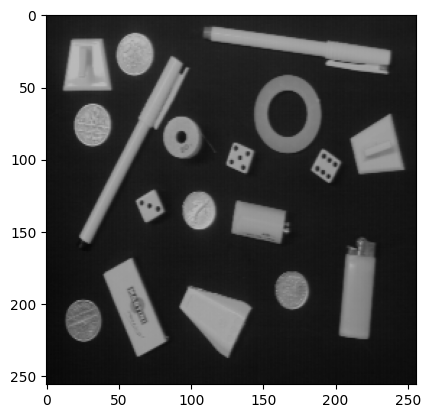

In [5]:
plt.imshow(image_int32, cmap='gray', vmin=0, vmax=255)

# Operador de Sobel

In [6]:
img_sh = sobel_h(image_int32)
img_sv = sobel_v(image_int32)

img_sh_abs = np.abs(img_sh)
img_sv_abs = np.abs(img_sv)
img_m = img_sh_abs + img_sv_abs

Text(0.5, 1.0, 'Sobel')

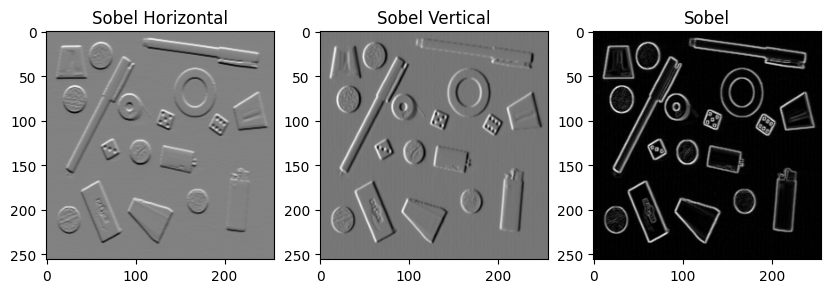

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_sh, cmap='gray')
plt.title('Sobel Horizontal')

plt.subplot(1, 3, 2)
plt.imshow(img_sv, cmap='gray')
plt.title('Sobel Vertical')

plt.subplot(1, 3, 3)
plt.imshow(img_m, cmap='gray')
plt.title('Sobel')


## Descripción

El filtro Sobel Horizontal resalta los bordes en la dirección horizontal, haciendo visibles los cambios de intensidad en la vertical, mientras que el Sobel Vertical enfatiza los bordes verticales, destacando los cambios en la horizontal. La tercera imagen combina ambos (horizontal y vertical), proporcionando una vista más clara y contrastada de todos los bordes. 

## Filtro Sobel

In [8]:
img_s = sobel(image_int32)

Text(0.5, 1.0, 'Sobel Horizontal + Vertical')

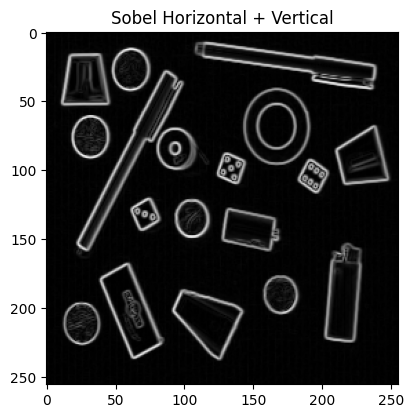

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_s, cmap='gray')
plt.title('Sobel Horizontal + Vertical')

# Operador de Prewitt

In [10]:
img_ph = prewitt_h(image_int32)
img_pv = prewitt_v(image_int32)

img_ph_abs = np.abs(img_ph)
img_pv_abs = np.abs(img_pv)
img_pm = img_ph_abs + img_pv_abs

Text(0.5, 1.0, 'Prewitt')

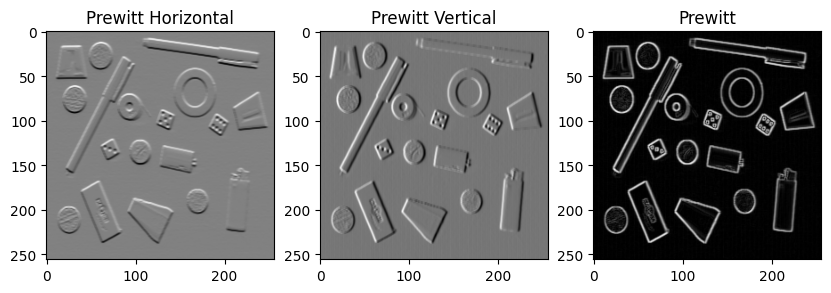

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_ph, cmap='gray')
plt.title('Prewitt Horizontal')

plt.subplot(1, 3, 2)
plt.imshow(img_pv, cmap='gray')
plt.title('Prewitt Vertical')

plt.subplot(1, 3, 3)
plt.imshow(img_pm, cmap='gray')
plt.title('Prewitt')

## Descripción

El filtro Prewitt Horizontal resalta los bordes en la dirección horizontal, haciendo visibles los cambios de intensidad en la vertical, mientras que el Prewitt Vertical enfatiza los bordes verticales, destacando los cambios en la horizontal. La tercera imagen combina ambos (horizontal y vertical), proporcionando una vista más clara y contrastada de todos los bordes. 


# Filtro Prewitt

In [12]:
img_p = prewitt(image_int32)

Text(0.5, 1.0, 'Prewitt Horizontal + Vertical')

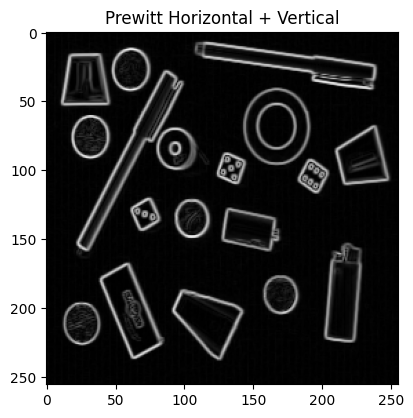

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_p, cmap='gray')
plt.title('Prewitt Horizontal + Vertical')

# Diferencia entre Sobel y Prewitt:

In [14]:
sub = cv2.subtract(img_pm, img_m)

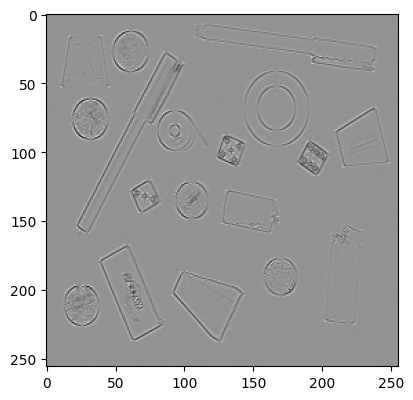

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sub, cmap='gray')

## ¿Qué diferencia visual hay entre el operador de Sobel y el de Prewitt?

In [16]:
def show_histogram(image, values=256):
  histogram, bin_edges = np.histogram(image, bins=values, range=(0, values-1))
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, values-1])

  ax.plot(bin_edges[0:-1], histogram)
  plt.show()

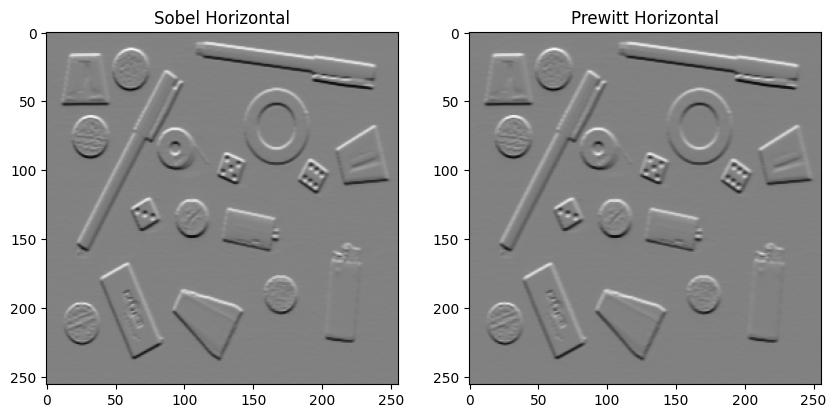

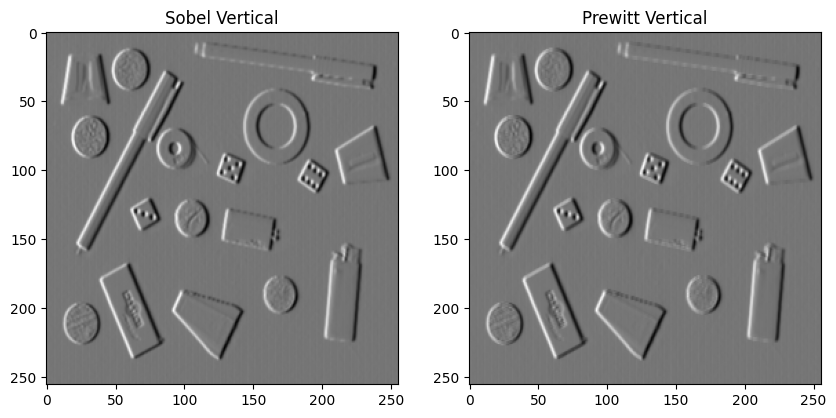

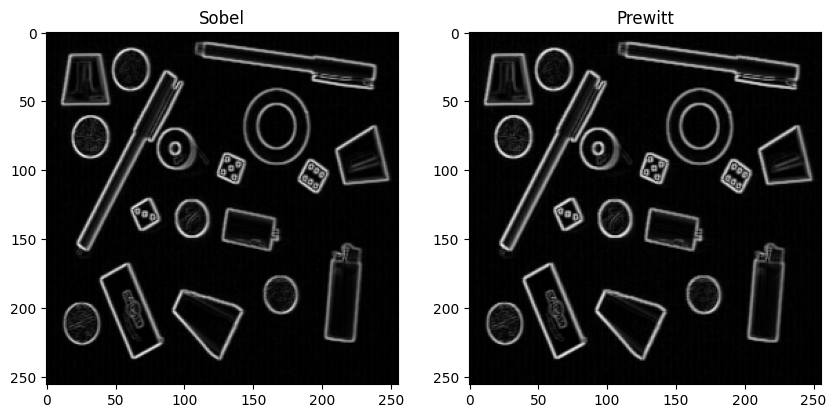

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_sh, cmap='gray')
plt.title('Sobel Horizontal')

plt.subplot(1, 2, 2)
plt.imshow(img_ph, cmap='gray')
plt.title('Prewitt Horizontal')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_sv, cmap='gray')
plt.title('Sobel Vertical')

plt.subplot(1, 2, 2)
plt.imshow(img_pv, cmap='gray')
plt.title('Prewitt Vertical')


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_m, cmap='gray')
plt.title('Sobel')

plt.subplot(1, 2, 2)
plt.imshow(img_pm, cmap='gray')
plt.title('Prewitt')
plt.show()

## Para explicar esta diferencia, calcule numéricamente las respuestas del cálculo del gradiente en x, en y y de la norma del gradiente de cada uno de los dos filtros en los siguientes casos:

In [45]:
def aplicar_filtro(matriz, kernel):
    return cv2.filter2D(matriz, cv2.CV_64F, kernel)

casos = {
    "horizontal": np.array([[0, 0, 0], [0, 0, 0], [255, 255, 255]], dtype=np.uint8),
    "vertical": np.array([[0, 0, 255], [0, 0, 255], [0, 0, 255]], dtype=np.uint8),
    "oblicua": np.array([[0, 0, 255], [0, 255, 255], [255, 255, 255]], dtype=np.uint8),
    "alejada": np.array([[0, 0, 0, 0], [0, 0, 0, 255], [0, 0, 255, 255], [0, 255, 255, 255]], dtype=np.uint8),
}


sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])


resultados = {}
for nombre, img in casos.items():
    grad_sobel_x = aplicar_filtro(img, sobel_x)
    grad_sobel_y = aplicar_filtro(img, sobel_y)
    mag_sobel = np.abs(grad_sobel_x) + np.abs(grad_sobel_y)
    
    grad_prewitt_x = aplicar_filtro(img, prewitt_x)
    grad_prewitt_y = aplicar_filtro(img, prewitt_y)
    mag_prewitt = np.abs(grad_prewitt_x) + np.abs(grad_prewitt_y)
    
    resultados[nombre] = {
        "Sobel X": grad_sobel_x,
        "Sobel Y": grad_sobel_y,
        "Sobel Mag": mag_sobel,
        "Prewitt X": grad_prewitt_x,
        "Prewitt Y": grad_prewitt_y,
        "Prewitt Norm": mag_prewitt,
    }

for nombre, valores in resultados.items():
    print(f"\nResultados para {nombre}:")
    for clave, matriz in valores.items():
        print(f"{clave}:\n{matriz}\n")



Resultados para horizontal:
Sobel X:
[[   0.    0.    0.]
 [1020. 1020. 1020.]
 [   0.    0.    0.]]

Sobel Y:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Sobel Mag:
[[   0.    0.    0.]
 [1020. 1020. 1020.]
 [   0.    0.    0.]]

Prewitt X:
[[  0.   0.   0.]
 [765. 765. 765.]
 [  0.   0.   0.]]

Prewitt Y:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Prewitt Norm:
[[  0.   0.   0.]
 [765. 765. 765.]
 [  0.   0.   0.]]


Resultados para vertical:
Sobel X:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Sobel Y:
[[   0. 1020.    0.]
 [   0. 1020.    0.]
 [   0. 1020.    0.]]

Sobel Mag:
[[   0. 1020.    0.]
 [   0. 1020.    0.]
 [   0. 1020.    0.]]

Prewitt X:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Prewitt Y:
[[  0. 765.   0.]
 [  0. 765.   0.]
 [  0. 765.   0.]]

Prewitt Norm:
[[  0. 765.   0.]
 [  0. 765.   0.]
 [  0. 765.   0.]]


Resultados para oblicua:
Sobel X:
[[   0.    0.    0.]
 [1020.  765.  510.]
 [   0.    0.    0.]]

Sobel Y:
[[   0. 1020.    0.]
 [   0.  765.    0.]
 [   0.  510.    0.]]

Sobe